In [1]:
#RF
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('features_16.csv')


In [3]:
data.shape

(11430, 18)

In [4]:
data.describe()

,length_url,avg_word_path,ratio_digits_host,avg_words_raw,ratio_digits_url,domain_age,web_traffic,avg_word_host,ratio_extMedia,links_in_tags,ratio_extErrors,nb_hyperlinks,ratio_extRedirection,safe_anchor,ratio_intHyperlinks,ratio_extHyperlinks
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,5.092425,0.025024,7.258882,0.053137,4062.543745,8.567566e+05,7.678075,23.236293,51.978211,0.062469,87.189764,0.158926,37.063922,0.602457,0.276720
std,55.297318,7.147050,0.093422,4.145827,0.089363,3107.784600,1.995606e+06,3.578435,38.386577,41.523144,0.156209,166.758254,0.266437,39.073385,0.376474,0.319958
min,12.000000,0.000000,0.000000,2.000000,0.000000,-12.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,5.250000,0.000000,972.250000,0.000000e+00,5.250000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.224991,0.000000
50%,47.000000,4.857143,0.000000,6.500000,0.000000,3993.000000,1.651000e+03,7.000000,0.000000,60.000000,0.000000,34.000000,0.000000,23.294574,0.743442,0.131148
75%,71.000000,6.714286,0.000000,8.000000,0.079365,7026.750000,3.738455e+05,9.000000,33.333333,98.061004,0.034483,101.000000,0.230769,75.000000,0.944767,0.474840
max,1641.000000,250.000000,0.800000,128.250000,0.723881,12874.000000,1.076799e+07,39.000000,100.000000,100.000000,1.000000,4659.000000,2.000000,100.000000,1.000000,1.000000


In [5]:
pd.set_option('display.max_rows', 500)
data.isna().sum()


url                     0
length_url              0
avg_word_path           0
ratio_digits_host       0
avg_words_raw           0
ratio_digits_url        0
domain_age              0
web_traffic             0
avg_word_host           0
ratio_extMedia          0
links_in_tags           0
ratio_extErrors         0
nb_hyperlinks           0
ratio_extRedirection    0
safe_anchor             0
ratio_intHyperlinks     0
ratio_extHyperlinks     0
status                  0
dtype: int64

In [6]:
pd.reset_option('display.max_rows')


In [7]:
original_dataset = data.copy()


In [8]:
class_map = {'legitimate':0, 'phishing':1}
original_dataset['status'] = original_dataset['status'].map(class_map)


In [9]:
corr_matrix = original_dataset.corr()

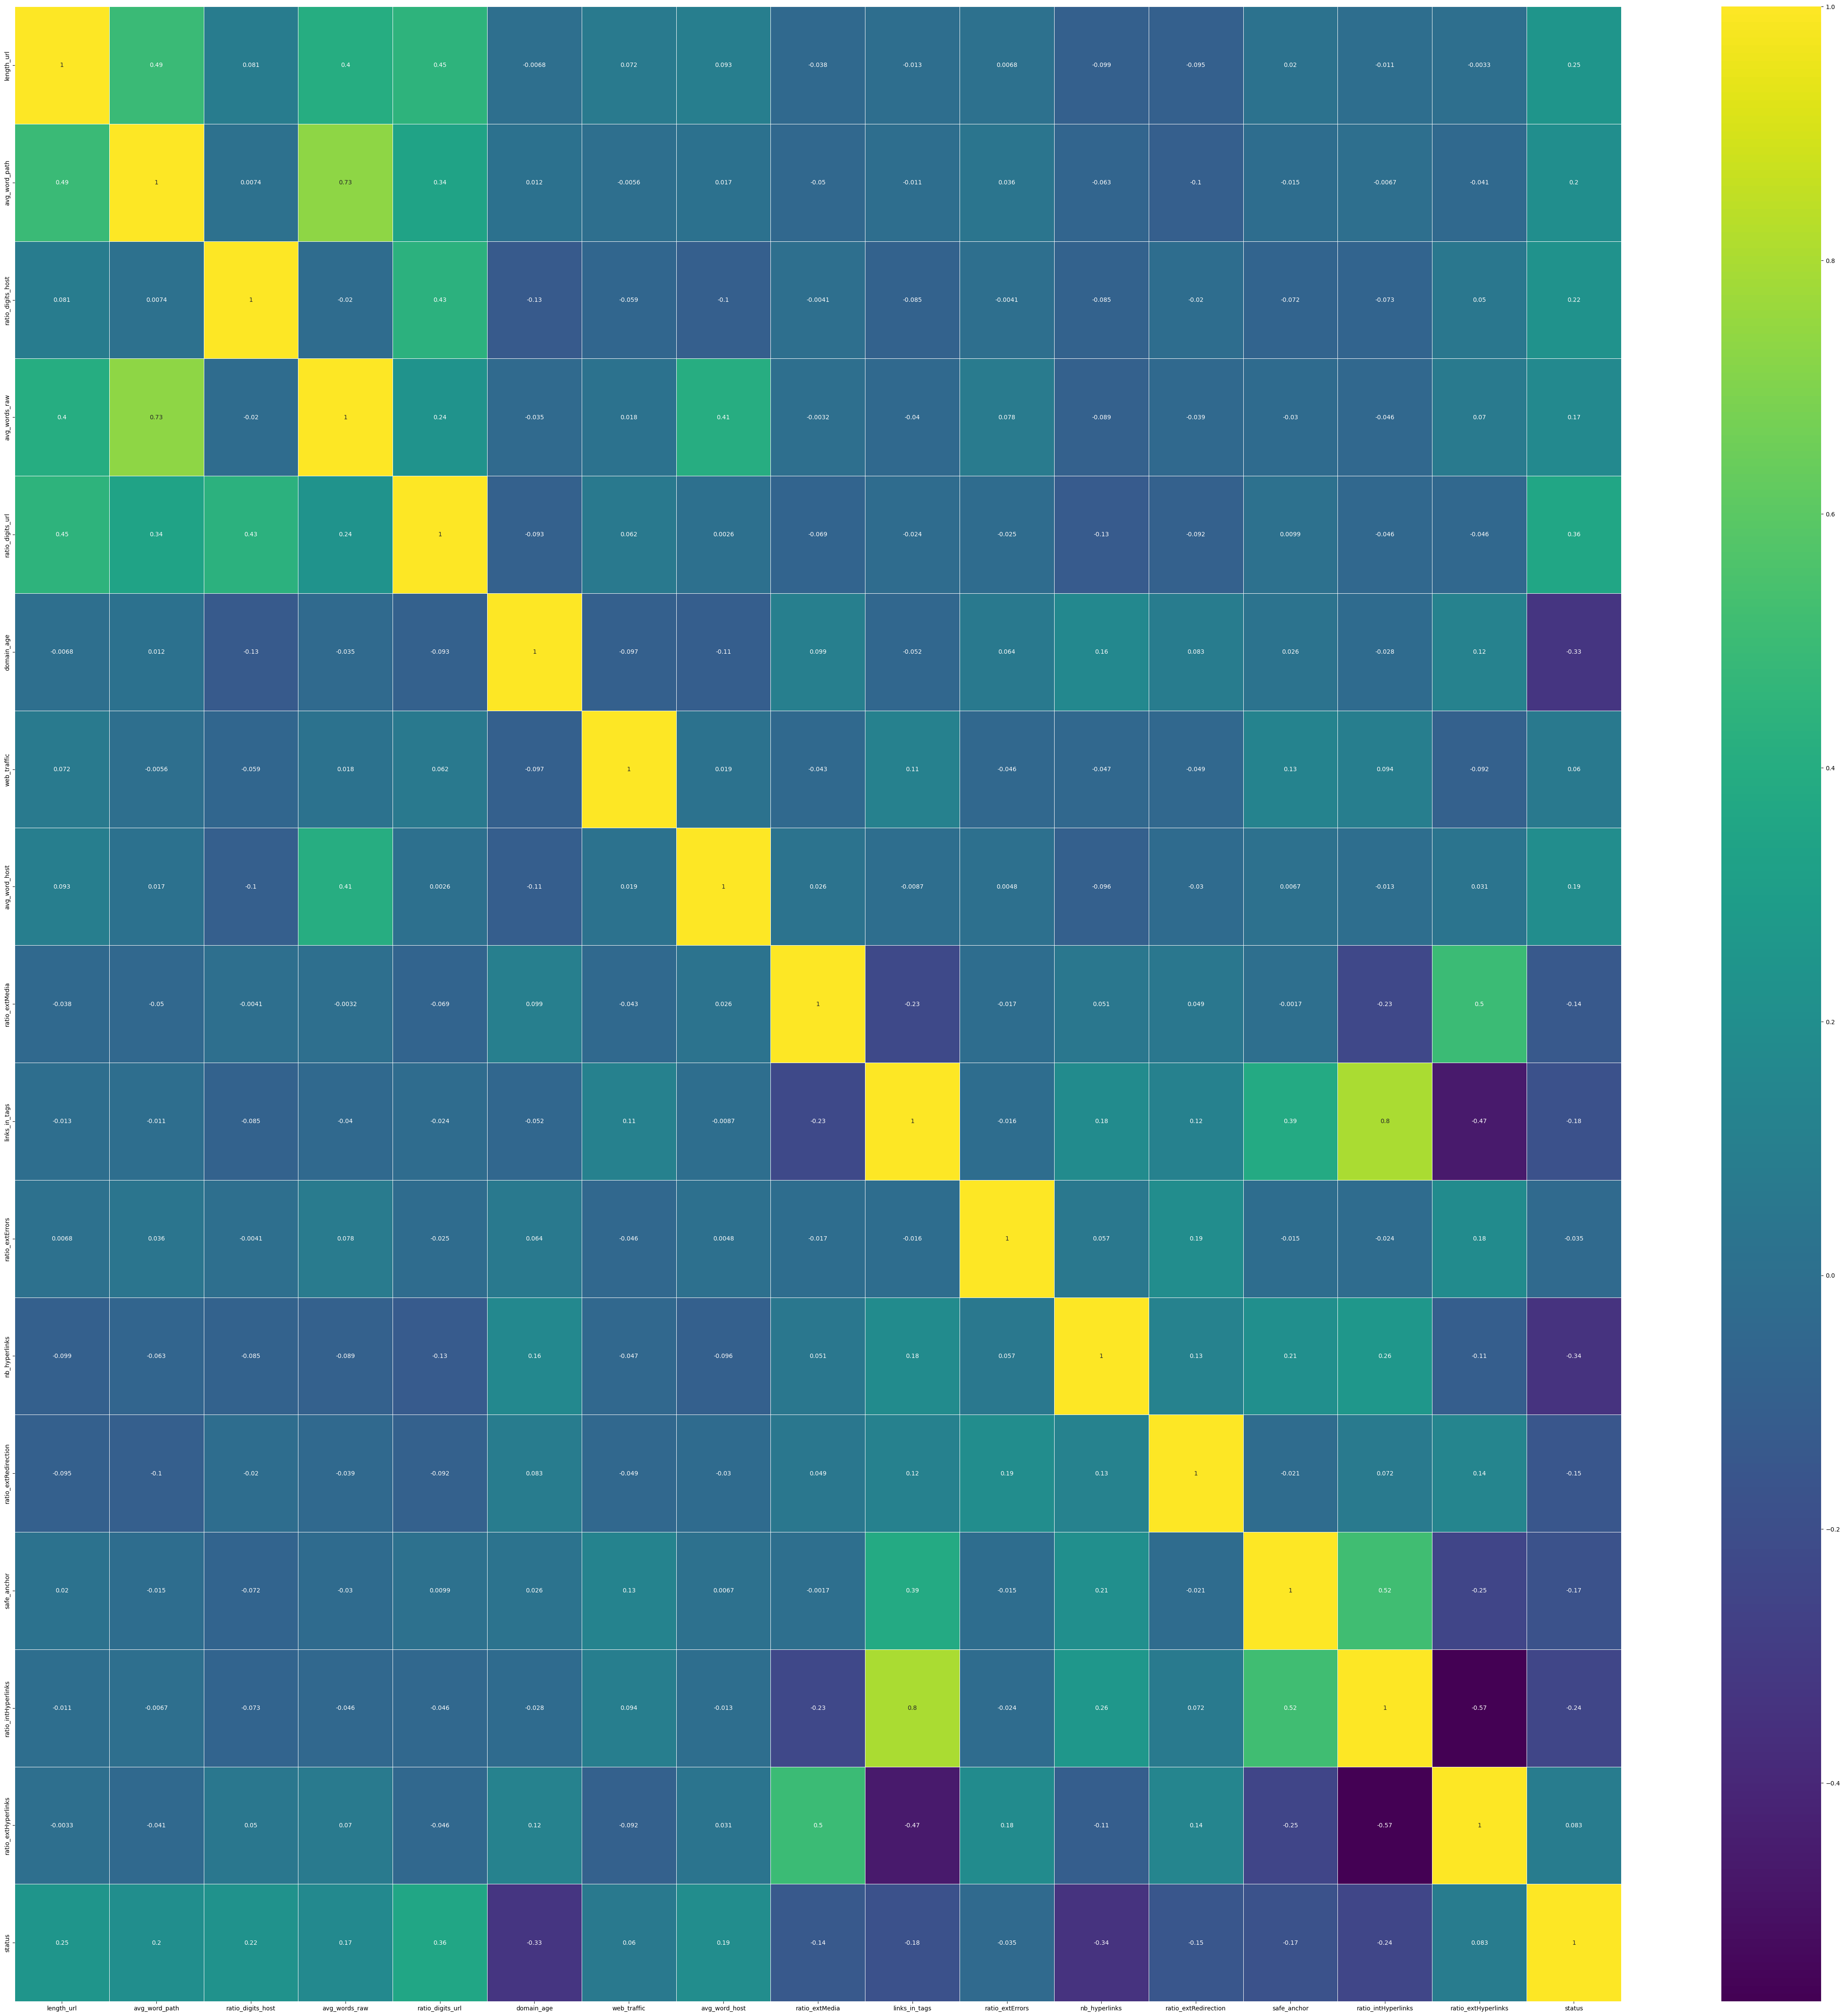

In [10]:
plt.figure(figsize=(60,60))
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue') 
sns.heatmap(corr_matrix, annot=True, linewidth=0.4, cmap=color)
plt.savefig('heatmap')
plt.show()

In [11]:
corr_matrix.shape

(17, 17)

In [12]:
corr_matrix['status']

length_url              0.248580
avg_word_path           0.197256
ratio_digits_host       0.224335
avg_words_raw           0.167564
ratio_digits_url        0.356395
domain_age             -0.331889
web_traffic             0.060388
avg_word_host           0.193502
ratio_extMedia         -0.140406
links_in_tags          -0.184401
ratio_extErrors        -0.034703
nb_hyperlinks          -0.342628
ratio_extRedirection   -0.150827
safe_anchor            -0.173397
ratio_intHyperlinks    -0.243982
ratio_extHyperlinks     0.083357
status                  1.000000
Name: status, dtype: float64

In [13]:
status_corr = corr_matrix['status']
status_corr.shape


(17,)

In [14]:
def feature_selector_correlation(cmatrix, threshold):
    
    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score)) 
    return result

In [15]:
features_selected = feature_selector_correlation(status_corr, 0.2)
features_selected

[('length_url', ['0.248580']),
 ('ratio_digits_host', ['0.224335']),
 ('ratio_digits_url', ['0.356395']),
 ('domain_age', ['-0.331889']),
 ('nb_hyperlinks', ['-0.342628']),
 ('ratio_intHyperlinks', ['-0.243982']),
 ('status', ['1.000000'])]

In [16]:
selected_features = [i for (i,j) in features_selected if i != 'status']
selected_features


['length_url',
 'ratio_digits_host',
 'ratio_digits_url',
 'domain_age',
 'nb_hyperlinks',
 'ratio_intHyperlinks']

In [17]:
X_selected = original_dataset[selected_features]
X_selected

,length_url,ratio_digits_host,ratio_digits_url,domain_age,nb_hyperlinks,ratio_intHyperlinks
0,37,0.000000,0.000000,-1,17,0.529412
1,77,0.000000,0.220779,5767,30,0.966667
2,126,0.000000,0.150794,4004,4,1.000000
3,18,0.000000,0.000000,-1,149,0.973154
4,55,0.000000,0.000000,8175,102,0.470588
...,...,...,...,...,...,...
11425,45,0.000000,0.000000,5396,199,0.884422
11426,84,0.000000,0.023810,6728,3,1.000000
11427,105,0.000000,0.142857,8515,68,0.470588
11428,38,0.000000,0.000000,2836,32,0.375000


In [18]:
X_selected.shape

(11430, 6)

In [19]:
y = original_dataset['status']
y


0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model_random_forest = RandomForestClassifier(n_estimators=350,
                                             random_state=42,
                                             )


model_random_forest.fit(X_train,y_train)


RandomForestClassifier(n_estimators=350, random_state=42)

In [34]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


In [35]:
def custom_accuracy_set (model, X_train, X_test, y_train, y_test, train=True):
    
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    
    
    if train:
        x = X_train
        y = y_train
    elif not train:
        x = X_test
        y = y_test
        
    y_predicted = model.predict(x)
    
    accuracy = accuracy_score(y, y_predicted)
    print('model accuracy: {0:4f}'.format(accuracy))
    oconfusion_matrix = confusion_matrix(y, y_predicted)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    oroc_auc_score = lb.transform(y), lb.transform(y_predicted)	

In [36]:
custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=True)


model accuracy: 0.998250
Confusion matrix: 
 [[4547   11]
 [   5 4581]]


In [37]:
custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=False)

model accuracy: 0.898075
Confusion matrix: 
 [[1032  125]
 [ 108 1021]]


In [38]:
#MLP
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score
from sklearn.feature_selection import SelectPercentile , chi2 , f_classif
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [39]:
data = pd.read_csv('dataset_phishing set with 10 extracted features by feature engineering.csv')


data

X = data.copy()

Y = data["status"]

X.drop(["status" , "url"] , axis=1 , inplace=True)

Cols = X.columns;

Y = Y == "legitimate"

In [40]:
Scaler = StandardScaler(copy=True , with_mean=True , with_std=True)
X = Scaler.fit_transform(X)


In [41]:
SP = SelectPercentile(score_func=f_classif , percentile=60)

In [42]:
X = SP.fit_transform(X , Y)


In [43]:
print("Number Of Features : " , Cols[SP.get_support()])

Number Of Features :  Index(['tld_in_subdomain', 'nb_and', 'phish_hints', 'ratio_digits_host',
       'abnormal_subdomain', 'ratio_digits_url'],
      dtype='object')


In [44]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.20 , random_state=10 , shuffle=True)


In [45]:
Model = MLPClassifier(solver='adam' , alpha=0.01 , hidden_layer_sizes=(100 , 100 , 100 , 100) , max_iter=100 , random_state=44)
Ans1 = Model.fit(x_train , y_train)
print("Score Model For Training Data : " , Model.score(x_train , y_train))

Score Model For Training Data :  0.7689195100612424


In [46]:
YPred = Ans1.predict(x_test)
conf_matrix = confusion_matrix(y_test ,YPred)
print("Confusion Matrix of the Test Set")
print("-----------")
print(conf_matrix)
print("Precision of the MLP :\t"+str(precision_score(y_test,YPred)))
print("Recall of the MLP    :\t"+str(recall_score(y_test,YPred)))
print("F1 Score of the MLP :\t"+str(f1_score(y_test,YPred)))
print("Accuracy Score of the MLP :\t"+str(accuracy_score(y_test,YPred)))


Confusion Matrix of the Test Set
-----------
[[ 718  416]
 [ 105 1047]]
Precision of the MLP :	0.7156527682843472
Recall of the MLP    :	0.9088541666666666
F1 Score of the MLP :	0.8007648183556405
Accuracy Score of the MLP :	0.7720909886264217


In [47]:
#XGBoost
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [48]:
data = pd.read_csv('dataset_phishing set with 10 extracted features by feature engineering.csv')
print(data)

                                                     url  tld_in_subdomain  \
0                  http://www.crestonwood.com/router.php                 0   
1      http://shadetreetechnology.com/V4/validation/a...                 0   
2      https://support-appleld.com.secureupdate.duila...                 1   
3                                     http://rgipt.ac.in                 0   
4      http://www.iracing.com/tracks/gateway-motorspo...                 0   
...                                                  ...               ...   
11425      http://www.fontspace.com/category/blackletter                 0   
11426  http://www.budgetbots.com/server.php/Server%20...                 0   
11427  https://www.facebook.com/Interactive-Televisio...                 0   
11428             http://www.mypublicdomainpictures.com/                 0   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...                 1   

       nb_dslash  dns_record  nb_and  nb_semicolumn  phish_hint

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import balanced_accuracy_score
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

data.columns




from sklearn.model_selection import train_test_split


In [51]:
y = data.status
X = data.drop(['status'], axis=1)

In [52]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [53]:
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]


In [54]:
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


In [55]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()



In [56]:
numerical_transformer = SimpleImputer(strategy='constant')



In [57]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [58]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [59]:
print(data.describe)

<bound method NDFrame.describe of                                                      url  tld_in_subdomain  \
0                  http://www.crestonwood.com/router.php                 0   
1      http://shadetreetechnology.com/V4/validation/a...                 0   
2      https://support-appleld.com.secureupdate.duila...                 1   
3                                     http://rgipt.ac.in                 0   
4      http://www.iracing.com/tracks/gateway-motorspo...                 0   
...                                                  ...               ...   
11425      http://www.fontspace.com/category/blackletter                 0   
11426  http://www.budgetbots.com/server.php/Server%20...                 0   
11427  https://www.facebook.com/Interactive-Televisio...                 0   
11428             http://www.mypublicdomainpictures.com/                 0   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...                 1   

       nb_dslash  dns_record 

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)


In [62]:
y_valid = le.fit_transform(y_valid)

In [63]:
print(y_train)

[0 1 0 ... 1 1 1]


In [64]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [65]:
model = xgb.XGBClassifier()

In [66]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [67]:
my_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['tld_in_subdomain',
                                                   'nb_dslash', 'dns_record',
                                                   'nb_and', 'nb_semicolumn',
                                                   'phish_hints',
                                                   'ratio_digits_host',
                                                   'abnormal_subdomain',
                                                   'ratio_digits_url',
                                                   'web_traffic']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
   

In [68]:
preds = my_pipeline.predict(X_valid)
print(accuracy_score(preds,y_valid))

0.8661417322834646


In [69]:
#Gaussian Naive Bayes method
import numpy as np
import pandas as pd 

import os
import pickle
import numpy as np
import pandas as pd
import sklearn
from sklearn.naive_bayes import GaussianNB #model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import time



start = time.time()

In [72]:
removeCols = ['url', 'status']
featuresCol = [i for i in data.columns if i not in removeCols]
StatusCol = 'status'
data[StatusCol] = data[StatusCol]
features, targets = data[featuresCol], data[StatusCol]


In [73]:
class Scaler():
    
    def __init__(self, scaler, feature_range=None):
        self.columns = None
        self.index = None
        self.feature_range = feature_range
        self.scaler = scaler()
        if (isinstance(self.scaler, sklearn.preprocessing._data.MinMaxScaler)
            and isinstance(self.feature_range, tuple)):
            self.scaler = scaler(feature_range = self.feature_range)
        
    def fit(self, X):
        self.scaler = self.scaler.fit(X)
        return self
                
    def transform(self, X):
        scaled_X = self.scaler.transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            scaled_X = pd.DataFrame(scaled_X, index=self.index, columns=self.columns)
        return scaled_X
    
    def inverse_transform(self, X):
        inversed_X = self.scaler.inverse_transform(X)
        
        if isinstance(X, pd.core.frame.DataFrame):
            self.columns = X.columns
            self.index = X.index
            inversed_X = pd.DataFrame(inversed_X, index=self.index, columns=self.columns)
        return inversed_X


In [74]:
train_size = 0.85 
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, shuffle=True, train_size=train_size,
    random_state=42)

In [75]:
scaler = Scaler(StandardScaler) 
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [76]:
naive_bayes = GaussianNB() #call model
naive_bayes = naive_bayes.fit(X_train, y_train)
pred = naive_bayes.predict(X_train)
print(f'\nTraining Accuracy: {round(accuracy_score(y_train, pred)*100, 4)}%')


Training Accuracy: 69.7684%


In [77]:
X_test = scaler.transform(X_test)
pred = naive_bayes.predict(X_test)

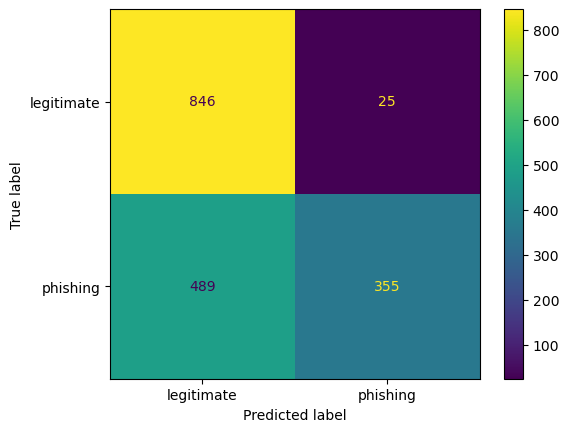

In [78]:
cm = confusion_matrix(y_test, pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
display_cm.plot()
plt.show()


In [79]:
print(f'Accuracy: {round(accuracy_score(y_test, pred)*100, 4)}%')
end = time.time()
finalTime = end - start
print("Total time (in seconds): " + str(finalTime))


Accuracy: 70.0292%
Total time (in seconds): 187.54685473442078
